# Draw plots of aerosol daily emissions data
This is used to draw plots for the IPCC report

In [1]:
import netCDF4 as nc
import pandas as pd
from math import floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\rlamboll\AppData\Local\Continuum\anaconda3\envs\netcfd-6\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [163]:
output_folder = "../output/aerosols/daily/"
save_folder = "../output/plots/"
base_str = "baseline"
scenarios = ["1_year"]
variable_names = {
    "SO2": "SO2_em_anthro", "NOx": "NOx_em_anthro", "CO2": 
}
base_file = "cut_{}-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.ncdaily_v4.7.nc_{}.nc"
aviation_file = "../output/aviation/cut_NOx-em-AIR-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.nc_v4.7.nc_flightrd_mp06_daily_v4.7.nc"
aviation_baseline = "../output/aviation/cut_NOx-em-AIR-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.nc_baseline_v4.7.nc"
save_str = "emission_map_daily_v2.png"
global_save = "global_emission_daily_v2.png"
co2_file = "../../COVID19_emissions_data/sector_emissions/Covid_CO2emissions_sectors_July29.csv"
timeseries_savename = "dailydata_emissions_reduction_timseries.csv"

In [47]:
co2_data = pd.read_csv(co2_file, header=0, index_col=0)
co2_tot_data = co2_data[co2_data.Sector == "total"]
co2_tot_data = co2_tot_data.set_index(["Country", "ISO_A3", "Sector"], drop=True)
co2_tot_data

,,,Base(MtCO2/day),Base%,1,2,3,4,5,6,7,8,...,357,358,359,360,361,362,363,364,365,366
Country,ISO_A3,Sector,,,,,,,,,,,,,,,,,,,,,
Albania,ALB,total,0.012846,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Algeria,DZA,total,0.432618,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049,-0.154049
Angola,AGO,total,0.104179,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137,-0.094137
Argentina,ARG,total,0.552309,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584,-0.178584
Armenia,ARM,total,0.015752,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,total,0.390822,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597,-0.163597
Vietnam,VNM,total,0.574687,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001584,0.001584,0.001584,0.001584,0.001584,0.001584,0.001584,0.001584,0.001584,0.001584
Yemen,YEM,total,0.028783,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011634,0.011634,0.011634,0.011634,0.011634,0.011634,0.011634,0.011634,0.011634,0.011634


In [85]:
co2_world = pd.Series(index = co2_tot_data.columns)
co2_world[0] = 0
basesum = sum(co2_tot_data["Base(MtCO2/day)"])
for col in co2_world.index:
    co2_world[col] = sum(co2_tot_data["Base(MtCO2/day)"] * co2_tot_data[col])/basesum
co2_world

C:\Users\rlamboll\AppData\Local\Continuum\anaconda3\envs\netcfd-6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Base(MtCO2/day)     10.127001
Base%              100.000000
1                    0.000000
2                    0.000000
3                   -0.000290
                      ...    
362                 -0.103502
363                 -0.103502
364                 -0.103502
365                 -0.103502
366                 -0.103502
Length: 368, dtype: float64

In [86]:
co2_world = co2_world.drop(["Base%", "Base(MtCO2/day)"])

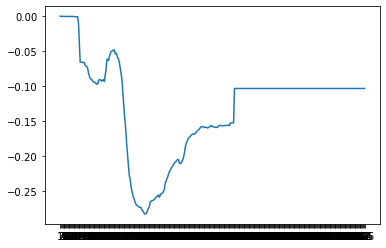

In [87]:
plt.plot(co2_world)

In [12]:
base_em = nc.Dataset(output_folder + base_file.format("SO2", base_str))
lats = base_em.variables["lat"][:]
lons = base_em.variables["lon"][:]

In [13]:
earth_rad = 6370 * 1e3 # radius of earth in m
area = earth_rad ** 2 * (lons[1] - lons[0]) * (lats[1] - lats[0]) * abs(np.cos(lats[:] * np.pi / 180)) * (np.pi / 180) ** 2

In [14]:
assert np.isclose(sum(area) * len(lons),  5.1 * 10 ** 14, rtol=0.1)  # Check this is the correct area of the earth in m^2! 

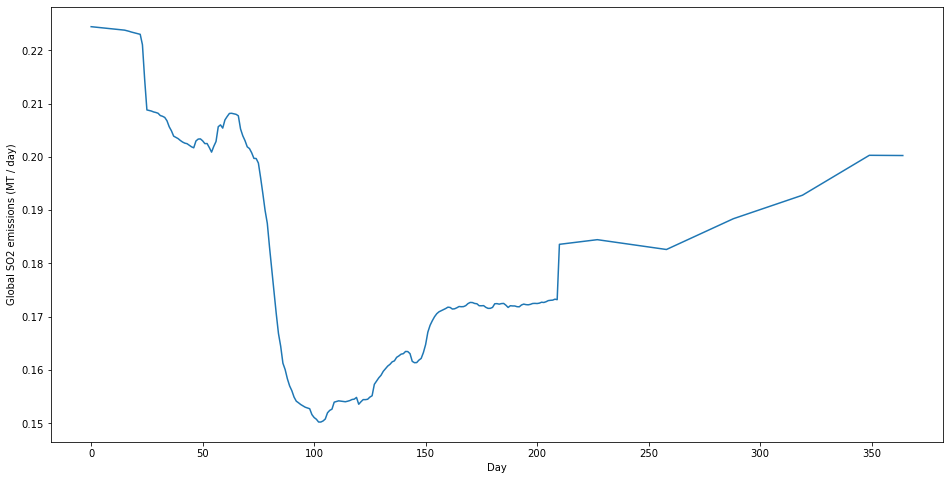

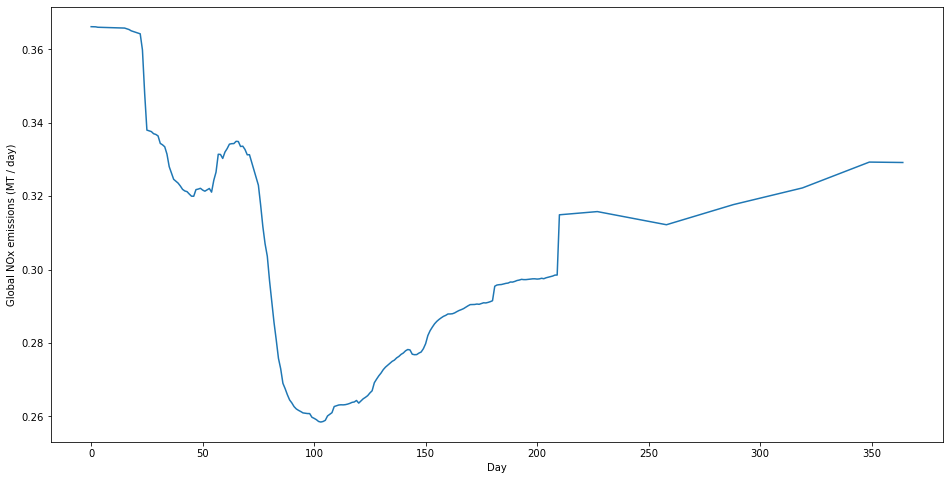

In [18]:
plot_times = range(365)
kg_per_sec = 3600 * 24 / 10 ** 9 # convert kg/sec to MT/day
for aerosol, varname in variable_names.items():
    base_em = nc.Dataset(output_folder + base_file.format(aerosol, base_str))
    world_base_emissions = base_em.variables[varname][:, :, :, :].sum(1).sum(2).dot(area)
    fig = plt.figure(figsize=(16, 8))
    #plt.plot(base_em.variables["time"][plot_times] - 5 * 365, world_base_emissions[plot_times] * kg_per_sec)
    for scenario in scenarios[:1]:
        emission = nc.Dataset(output_folder + base_file.format(aerosol, scenario))
        world_emissions = emission.variables[varname][:, :, :, :].sum(1).sum(2).dot(area)
        plt.plot(emission.variables["time"][plot_times] - 5 * 365, world_emissions[plot_times] * kg_per_sec)
        plt.xlabel("Day")
        ystring = "Global {} emissions (MT / day)".format(varname.replace("_em_anthro", ""))
        plt.ylabel(ystring)
        #plt.legend(["Baseline", "COVID-modified"])
    fig.savefig(save_folder + varname + global_save)

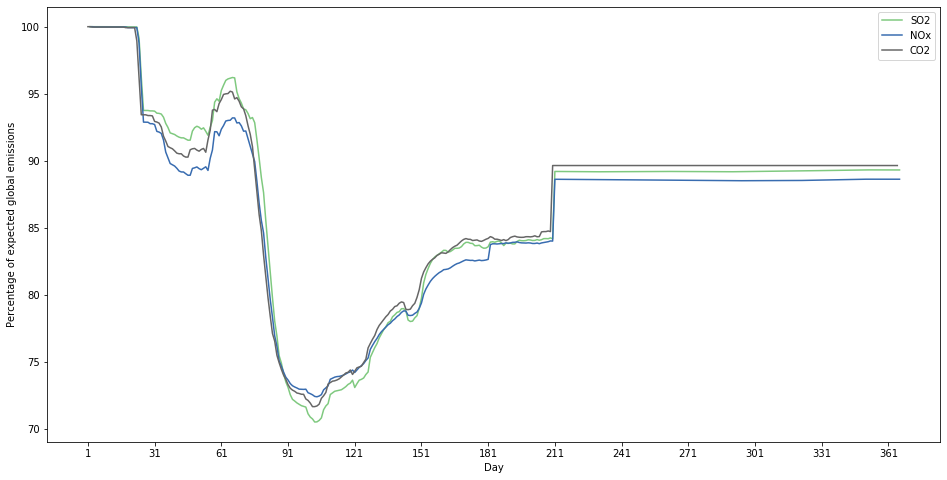

In [134]:
plot_times = range(366)
leg_str = []
int = 0
colorlist = plt.cm.Accent(np.linspace(0,1,len(variable_names.keys())+1))
fig = plt.figure(figsize=(16, 8))
timeseries_data=pd.DataFrame(columns=["Day"])
ax = ax = plt.subplot()
for aerosol, varname in variable_names.items():
    base_em = nc.Dataset(output_folder + base_file.format(aerosol, base_str))
    world_base_emissions = base_em.variables[varname][:, :, :, :].sum(1).sum(2).dot(area)
    for scenario in scenarios[:1]:
        emission = nc.Dataset(output_folder + base_file.format(aerosol, scenario))
        world_emissions = emission.variables[varname][:, :, :, :].sum(1).sum(2).dot(area)
        x = (emission.variables["time"][plot_times] - 5 * 365)[1:]
        y = 100 * (world_emissions[plot_times] / world_base_emissions[plot_times])[1:]
        y[-1] = y[-2]
        plt.plot(x, y, color=colorlist[int])
        int += 1
        plt.xlabel("Day")
        plt.ylabel("Percentage of expected global emissions")
        timeseries_data["Day"] = x
        timeseries_data["Emissions percentage for {}".format(aerosol)] = y
    leg_str.append(aerosol)
x = co2_world.index[:-1]
y = 100 * (1 + co2_world[:-1])
plt.plot(x, y, color=colorlist[-1])
ax.xaxis.set_ticks(np.arange(0, 365, 30))
leg_str.append("CO2")
plt.legend(leg_str)
timeseries_data["CO2"] = y.values
fig.savefig(save_folder + "all_relative_data" + global_save)
timeseries_data.to_csv(save_folder+timeseries_savename)

In [27]:
#SANDBOX: delete things below here

In [ ]:
stop

In [ ]:
aviation_data = nc.Dataset(aviation_file)
aviation_baseline = nc.Dataset(aviation_baseline)

In [159]:
max(aviation_NOx)/min(world_emissions)

0.05086925251556445

In [164]:
aviation_data = nc.Dataset(aviation_file)
aviation_baseline = nc.Dataset(aviation_baseline)

In [165]:
aviation_NOx = aviation_data.variables["NOx_em_AIR_anthro"][...].sum(1).sum(2).dot(area)
aviation_base_NOx = aviation_baseline.variables["NOx_em_AIR_anthro"][...].sum(1).sum(2).dot(area)

In [173]:
aviation_base_NOx.shape

(36,)

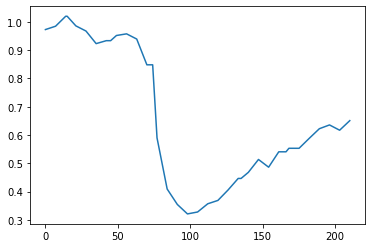

In [170]:
plt.plot(aviation_data.variables["time"][:]-365*5, aviation_NOx/aviation_base_NOx)

In [149]:
a.shape

(76, 360, 720)

In [135]:
timeseries_data

,Day,Emissions percentage for SO2,Emissions percentage for NOx,CO2
0,1.0,100.000000,100.000000,100.000000
1,2.0,100.000000,100.000000,100.000000
2,3.0,99.992012,99.973142,99.971019
3,4.0,99.992018,99.973143,99.971019
4,5.0,99.992023,99.973143,99.971019
...,...,...,...,...
360,361.0,89.321075,88.629559,89.649805
361,362.0,89.320717,88.629460,89.649805
362,363.0,89.320359,88.629360,89.649805
363,364.0,89.320002,88.629261,89.649805


In [127]:
len(100 * (world_emissions[plot_times] / world_base_emissions[plot_times]))

365